# Logistic Regression Example

A logistic regression learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/)

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [11]:
## Here, we're defining reusable components of computational graphs
# This is the idea used by tf.contrib.slim and tflearn

def linear(x, output_features):
    input_features=(x.get_shape().as_list())[-1]
    W = tf.Variable(tf.truncated_normal(shape=[input_features, output_features], stddev=.1))
    b = tf.Variable(tf.constant(.1,shape=[output_features]))
    pred = tf.add(tf.matmul(x, W), b)
    return pred

def maxpool(x, k=2, s=2):
    """
    k: size of kernel
    s: stride
    """
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                            strides=[1, 2, 2, 1], padding='VALID')

def convolution(x, output_channels, k=3, s=1, padding='VALID'):
    """
    k: the kernel size
    s: the stride

    Implement a function to make convolutional layers.
    Initialize an appropriate weight variable, shape=[k, k, input_channels, output_channels]
    Initialize an bias variable, shape=[output_channels]

    Use tf.nn.conv2d(), using the arguments appropriately
    
    """
    pass

In [14]:
## Here, we define different models we can use for MNIST classification
## Each model outputs a vector of 10 scores, which will turn into probabilities through softmax

def linear_model(x):
    return tf.nn.softmax(linear(x,10))

def dense_model(x):
    """
    Implement a network with the following architecture:
    
    Hidden layer 1: 256 units, with RELU activation
    Hidden Layer 2: 256 units, with RELU activation
    
    """
    h1 = linear(x, 256)
    r1 = tf.nn.relu(h1)
    pass

def lenet(x):
    """
    Implement a network with the following architecture:
    
    Conv1: uses a 5x5 kernel, and outputs 6 channels
    Use RELU
    Max pool 1: with a 2x2 kernel and stride of 2
    Conv2: uses a 5x5 kernel, and outputs 16 channels
    Use RELU
    Max pool 2: with a 2x2 kernel and stride of 2
    
    FLATTEN:
    (Hint, tf.reshape([output of maxpool_2], [-1, 4*4*16]))
    
    Hidden layer 1: 120 units, with RELU activation
    Hidden layer 1: 84 units, with RELU activation
    Output layer: 10 units
    """
    pass

model = linear_model

In [17]:
# Parameters
learning_rate = 0.1
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10])  # 0-9 digits recognition => 10 classes

# Construct model
pred = model(x)
# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0001 cost= 0.567815471
Epoch: 0002 cost= 0.371496745
Epoch: 0003 cost= 0.340570343
Epoch: 0004 cost= 0.324498376
Epoch: 0005 cost= 0.314056741
Epoch: 0006 cost= 0.306825416
Epoch: 0007 cost= 0.301027651
Epoch: 0008 cost= 0.296240798
Epoch: 0009 cost= 0.292672598
Epoch: 0010 cost= 0.289495309
Epoch: 0011 cost= 0.286551850
Epoch: 0012 cost= 0.284269794
Epoch: 0013 cost= 0.282229490
Epoch: 0014 cost= 0.280244072
Epoch: 0015 cost= 0.278568231
Epoch: 0016 cost= 0.276821938
Epoch: 0017 cost= 0.275447523
Epoch: 0018 cost= 0.273915727
Epoch: 0019 cost= 0.272896853
Epoch: 0020 cost= 0.271815346
Epoch: 0021 cost= 0.270705069
Epoch: 0022 cost= 0.269779371
Epoch: 0023 cost= 0.268825688
Epoch: 0024 cost= 0.267641206
Epoch: 0025 cost= 0.267187946
Optimization Finished!
('Accuracy:', 0.90033334)


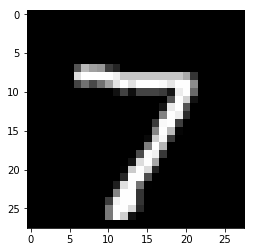

('Model prediction:', 7)


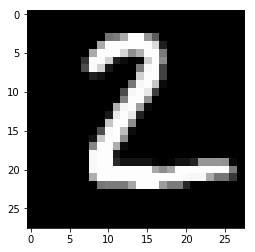

('Model prediction:', 2)


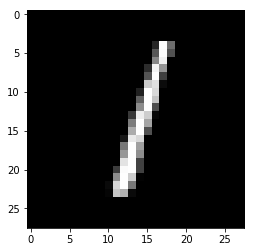

('Model prediction:', 1)


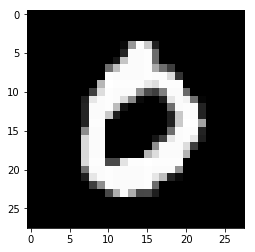

('Model prediction:', 0)


In [18]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            c,_ = sess.run([cost, optimizer], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)

    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))
    n_images = 4
    # Get images from test set
    test_images = mnist.test.images[:n_images]
    preds = sess.run(pred, feed_dict={x:test_images})
# Display
    for i in range(n_images):
        plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
        plt.show()
        print("Model prediction:", np.argmax(preds[i]))

In [ ]:
# Predict single images